In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
@tf.function
def f(x):
    y = 2 * x + 3
    return y

x = tf.linspace(0, 5, 101)
x = tf.cast(x, tf.float32)
y = f(x) + tf.random.normal(shape=[101])

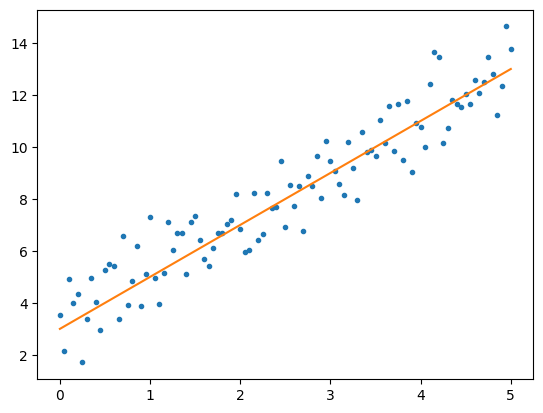

In [3]:
plt.plot(x, y, '.')
plt.plot(x, f(x))

In [4]:
class Model(tf.Module):
    def __init__(self, seed=22):
        rand_init = tf.random.uniform(shape=[2], minval=0., maxval=5., seed=seed)

        self.w = tf.Variable(rand_init[0])
        self.b = tf.Variable(rand_init[1])
    
    @tf.function
    def __call__(self, x):
        y = self.w * x + self.b
        return y

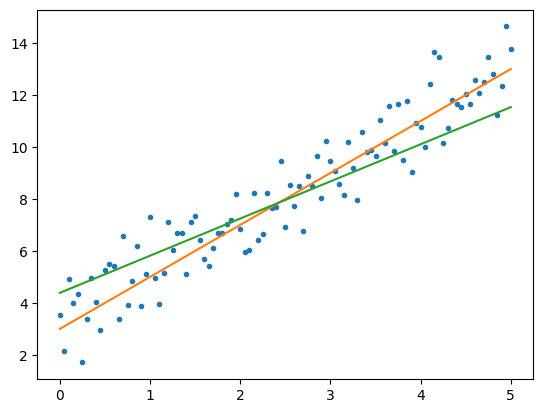

In [5]:
model = Model()

plt.figure()
plt.plot(x, y, '.')
plt.plot(x, f(x))
plt.plot(x, model(x))

In [6]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

print(loss(y, model(x)))

tf.Tensor(1.5083902, shape=(), dtype=float32)


  0%|          | 0/10201 [00:00<?, ?it/s]

100%|█████████▉| 10197/10201 [02:17<00:00, 72.25it/s]

Text(0.5, 0, 'loss')

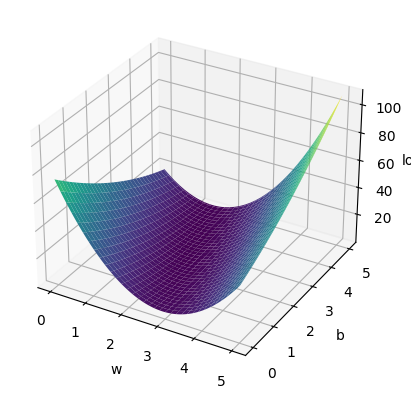

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

ax = plt.subplot(111, projection='3d')

w = np.linspace(0, 5, 101)
b = np.linspace(0, 5, 101)

W, B = np.meshgrid(w, b)

Z = np.zeros(shape=[101, 101])

pbar = tqdm(total=101*101)
for i in range(101):
    for j in range(101):
        model = Model()
        model.w = W[i, j]
        model.b = B[i, j]
        Z[i, j] = loss(y, model(x))
        pbar.update(1)

ax.plot_surface(W, B, Z, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

In [8]:
epochs = 100
learning_rate = 0.01

model = Model()

with tf.GradientTape() as tape:
    tape.watch(model.variables)
    batch_loss = loss(y, model(x))
grad = tape.gradient(batch_loss, model.variables)
print(grad)
model.w.assign_sub(learning_rate * grad[0])
model.b.assign_sub(learning_rate * grad[1])

with tf.GradientTape() as tape:
    tape.watch(model.variables)
    batch_loss = loss(y, model(x))
grad = tape.gradient(batch_loss, model.variables)
print(grad)
model.w.assign_sub(learning_rate * grad[0])
model.b.assign_sub(learning_rate * grad[1])

with tf.GradientTape() as tape:
    tape.watch(model.variables)
    batch_loss = loss(y, model(x))
print(tape.gradient(batch_loss, model.variables))

(<tf.Tensor: shape=(), dtype=float32, numpy=12.894263>, <tf.Tensor: shape=(), dtype=float32, numpy=44.099422>)
(<tf.Tensor: shape=(), dtype=float32, numpy=11.367562>, <tf.Tensor: shape=(), dtype=float32, numpy=39.734665>)
(<tf.Tensor: shape=(), dtype=float32, numpy=10.004493>, <tf.Tensor: shape=(), dtype=float32, numpy=35.843864>)


Loss of step 0: 59.019
Loss of step 10: 1.973
Loss of step 20: 0.967
Loss of step 30: 0.949
Loss of step 40: 0.949
Loss of step 50: 0.948
Loss of step 60: 0.948
Loss of step 70: 0.948
Loss of step 80: 0.948
Loss of step 90: 0.947
Loss of step 100: 0.947
Loss of step 110: 0.947
Loss of step 120: 0.947
Loss of step 130: 0.947
Loss of step 140: 0.947
Loss of step 150: 0.946
Loss of step 160: 0.946
Loss of step 170: 0.946
Loss of step 180: 0.946
Loss of step 190: 0.946
Loss of step 200: 0.946
Loss of step 210: 0.946
Loss of step 220: 0.946
Loss of step 230: 0.946
Loss of step 240: 0.946
Loss of step 250: 0.946
Loss of step 260: 0.946
Loss of step 270: 0.946
Loss of step 280: 0.945
Loss of step 290: 0.945
Loss of step 300: 0.945
Loss of step 310: 0.945
Loss of step 320: 0.945
Loss of step 330: 0.945
Loss of step 340: 0.945
Loss of step 350: 0.945
Loss of step 360: 0.945
Loss of step 370: 0.945
Loss of step 380: 0.945
Loss of step 390: 0.945
Loss of step 400: 0.945
Loss of step 410: 0.945
Lo

Text(0, 0.5, 'Loss (MSE)')

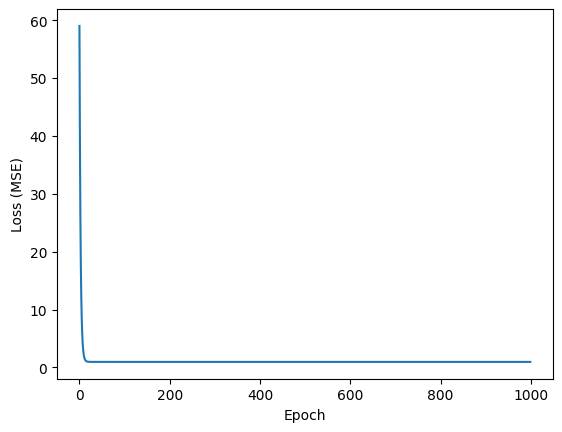

In [9]:
epochs = 1000
learning_rate = 0.01
losses = []

model = Model()

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        tape.watch(model.variables)
        batch_loss = loss(y, model(x))
    grads = tape.gradient(batch_loss, model.variables)
    for g,v in zip(grads, model.variables):
        v.assign_sub(learning_rate*g)

    loss_v = loss(y, model(x))
    losses.append(loss_v)
    if epoch % 10 == 0:
        print(f'Loss of step {epoch}: {loss_v.numpy():0.3f}')

plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")

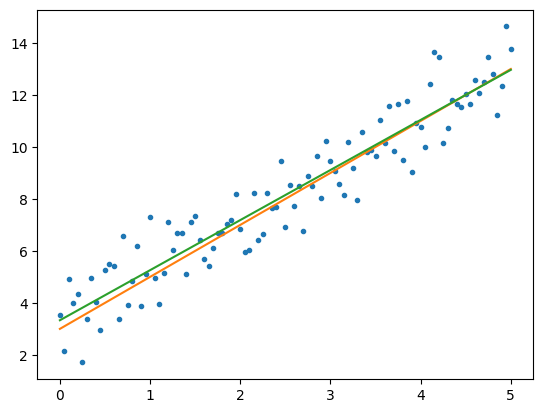

In [10]:
plt.figure()
plt.plot(x, y, '.')
plt.plot(x, f(x))
plt.plot(x, model(x))

In [11]:
print(loss(y, model(x)))
print(loss(y, f(x)))

tf.Tensor(0.9450817, shape=(), dtype=float32)
tf.Tensor(0.9784131, shape=(), dtype=float32)


100%|██████████| 10201/10201 [02:30<00:00, 72.25it/s]